# K-means clustering

## Assignment Explanation   
input 데이터는 2차원 평면 상에서의 포인트이다. 그래서 x, y 좌표로 구성되어 있는 point set. k만큼 clustering. 각 포인트가 cluster 구성한다. L이라는 함수는 z 포인트의 cluster label을 나타내는 함수로 정의한다. 예를 들면 k=3으로 두면 label을 1,2,3 혹은 0,1,2. k개의 클러스팅에서 1~k(0~k-1)로 볼 수 있겠다. 주어진 포인트에 대해 레이블을 표기하는 함수. $C_k$ 레이블이 k인 모든 포인트의 집합. Mu_k = k번째 cluster의 centroid 유사한 포인트, 데이터마다의 유사도를 데이터 간의 거리로 정의하는데, 그 때 유클리디언 거리를 기준으로 주어진 클러스터에 속한 데이터들의 centroid   

주어진 데이터 포인트들이 클러스터를 정의해야하고 클러스터 0~k-1까지의 각 클러스터 속하는 데이터 결정, 이가 결정되면 클러스터에서의 centroid 결정해야 한다. 로스함수는 데이터가 주어졌을 때 cluster k = 2라고 하자. 각 클러스터의 centroid mu_0, mu_1을 결정해야 한다. 각 포인트에 대해서 그 포인트와 그 포인트가 현재 계산할 때 포인트에는 label이 결정되어 있는데, 주어진 포인트와 포인트의 레이블에 해당하는 centroid의 거리가 최소여야 하고, 포인트의 개수로 나누어준다. 이는 k번째 클러스터에 속한 모든 포인트와 그것의 k번째 클러스터 거리를 모두 더한것 전체 데이터 수로 나눈 것.

## import library

In [561]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [562]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

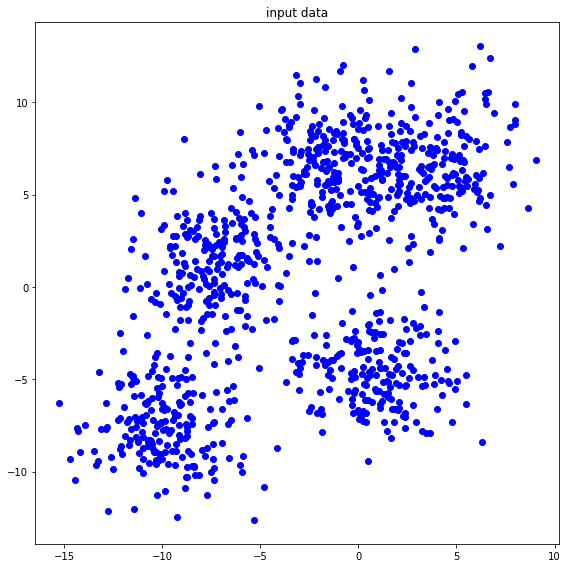

In [563]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [564]:
def compute_distance(feature, center):
    # feature = n(num of data) X m (num of feature) = 전체 점
    # center = 각 feature에 대한 centroid (하나의 점) 1 X 2

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    diff = feature - center # broadcasting
    distance = np.sqrt(np.sum(diff**2, axis=-1))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance # N X 1

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [565]:
def compute_centroid(feature, label_feature, label):
    # label = 하나의 레이블, scalar
    # 각 피처에 대해 centroid를 아웃풋으로, 레이블에 해당하는 센트로이드를 반환하기
    # label feature = n개의 point에 대한 레이블
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    cen_x = []
    cen_y = []
    feature = np.c_[feature, label_feature] # 0, 1, 2
    for i in range(feature.shape[0]):
        if feature[i, 2] == label:
            cen_x.append(feature[i, 0])
            cen_y.append(feature[i, 1])
    #print('!cen_x!\n', cen_x)
    #print('!cen_y!\n', cen_y)
    if (cen_x == []) & (cen_y == []) : # 특정 클러스터 None
        centroid = np.array([0, 0])
    else : 
        centroid = np.array([np.mean(cen_x), np.mean(cen_y)])
    #
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid # 1 X 2

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [566]:
def compute_label(distance): # (n, k)
    # distance = 각각 클러스터에 대한 distance가 주어졌을 때
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis=1) # 최소 index 값 ([0,1,0])
        

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## compute loss

In [567]:
def compute_loss(feature, label_feature, centroid, number_cluster):
    # k번째에 속한 모든 클러스터에 대해서 포인트와 센트로이드까지의 거리를 제곱한 것
    # 이를 모두 더하고 n(데이터 포인터 수)으로 나눈 것
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = 0
    feature = np.c_[feature, label_feature]
    for k in range(number_cluster):
        loss += np.sum(compute_distance(feature[feature[:, 2] == k][:, :2], centroid[k]))
    loss = 1 / feature.shape[0] * loss
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return loss

## the number of clusters $K = 2$

In [568]:
np.random.seed(0)
number_cluster          = 2
number_iteration        = 30  # you can modify this value
loss_iteration_02       = np.zeros(number_iteration) # iteration loss
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature)) # (100, 2, 2) 각 클러스터 센트로이드
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data)) # 피처에 대한 레이블

# 0. label은 처음에 initalized 된 상태
# 1. 결정된 레이블을 통해 Centroid 계산하기
# 2. 결정된 센으로 distance 모두 계산
# 3. assign label 
# 특정 클러스터에 포인트가 하나도 없다면 이전의 해당 클러스터의 이전 클러스터 유지 !!!
# 초기에는 모든 클러스터 센트로이드 존재, 
# 첫 번째는 사라지더라도 가장 초기 클러스터 센트로이드 유지하면서 계속 최적화

In [569]:
distance            = np.zeros((feature.shape[0], number_cluster)) # (1000, 2) n, k
centroid            = np.zeros((number_cluster, feature.shape[1])) # (2, 1000)

#seed_list = []
#for a in range(1000):
    #np.random.seed(a)
    #label_feature_02 = np.random.randint(0, number_cluster, size=(number_data))
for i in range(number_iteration):
        for k in range(number_cluster): # 0, 1
            centroid[k] = compute_centroid(feature, label_feature_02, k) # 1번 수행, centroid 구하기
            distance[:, k] = compute_distance(feature, centroid[k]) # 2번 수행, 각각의 거리 구하기
        label_feature_02 = compute_label(distance) # 3번 수행, assign labels
        loss = compute_loss(feature, label_feature_02, centroid, number_cluster)
        loss_iteration_02[i] = loss # loss 저장
        centroid_iteration_02[i] = centroid # centroid 저장
    #seed_list.append(loss_iteration_02[-1])

## the number of clusters $K = 4$

In [570]:
np.random.seed(4)
number_cluster          = 4
number_iteration        = 30    # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [571]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

distance            = np.zeros((feature.shape[0], number_cluster)) # (1000, 4) n, k
centroid            = np.zeros((number_cluster, feature.shape[1])) # (4, 1000)

for i in range(number_iteration):
        for k in range(number_cluster): 
            centroid[k] = compute_centroid(feature, label_feature_04, k) # 1번 수행, centroid 구하기
            distance[:, k] = compute_distance(feature, centroid[k]) # 2번 수행, 각각의 거리 구하기
        label_feature_04 = compute_label(distance) # 3번 수행, assign labels
        loss = compute_loss(feature, label_feature_04, centroid, number_cluster)
        loss_iteration_04[i] = loss # loss 저장
        centroid_iteration_04[i] = centroid # centroid 저장
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [572]:
np.random.seed(98)
number_cluster          = 8
number_iteration        = 30     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [573]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

#for a in range(100):
    #np.random.seed(a)
    
distance            = np.zeros((feature.shape[0], number_cluster)) 
centroid            = np.zeros((number_cluster, feature.shape[1])) 

for i in range(number_iteration):
    for k in range(number_cluster): 
        centroid[k] = compute_centroid(feature, label_feature_08, k) # 1번 수행, centroid 구하기
        distance[:, k] = compute_distance(feature, centroid[k]) # 2번 수행, 각각의 거리 구하기
        label_feature_08 = compute_label(distance) # 3번 수행, assign labels
        loss = compute_loss(feature, label_feature_08, centroid, number_cluster)
        loss_iteration_08[i] = loss # loss 저장
        centroid_iteration_08[i] = centroid # centroid 저장

# 100 : 2.21301685, 50 : 2.10649289 4 : 2.106125412271758
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [633]:
np.random.seed(75)
number_cluster          = 16
number_iteration        = 50     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [634]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

distance  = np.zeros((feature.shape[0], number_cluster)) 
centroid  = np.zeros((number_cluster, feature.shape[1])) 


for i in range(number_iteration):
        for k in range(number_cluster): 
                centroid[k] = compute_centroid(feature, label_feature_16, k) # 1번 수행, centroid 구하기
                distance[:, k] = compute_distance(feature, centroid[k]) # 2번 수행, 각각의 거리 구하기
        label_feature_16 = compute_label(distance) # 3번 수행, assign labels
        loss = compute_loss(feature, label_feature_16, centroid, number_cluster)
        loss_iteration_16[i] = loss # loss 저장
        centroid_iteration_16[i] = centroid # centroid 저장

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [576]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [577]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [578]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [579]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [580]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [581]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [582]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [583]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [615]:
def function_result_09():
    # 매 iter 마다 어떻게 센트로이드가 변하는지 표기하기
    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # centroid shape (iter)
    # centroid_iteration (50, 2, 2)
    # 

    for i in range(centroid_iteration_02.shape[1]): # 0,1
        x = centroid_iteration_02[:, i][:, 0]
        y = centroid_iteration_02[:, i][:, 1]
        plt.plot(x, y, label = 'cluster = %d' %i)
    
    initial_x = centroid_iteration_02[0][:, 0]
    initial_y = centroid_iteration_02[0][:, 1]
    plt.scatter(initial_x, initial_y, color = 'b', label = 'initial', marker = 'o')

    final = centroid_iteration_02.shape[0] - 1
    final_x = centroid_iteration_02[final][:, 0]
    final_y = centroid_iteration_02[final][:, 1]
    plt.scatter(final_x, final_y, color = 'r', label = 'final', marker = 's')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [620]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(centroid_iteration_04.shape[1]): # 0,1
        x = centroid_iteration_04[:, i][:, 0]
        y = centroid_iteration_04[:, i][:, 1]
        plt.plot(x, y, label = 'cluster = %d' %i)

    initial_x = centroid_iteration_04[0][:, 0]
    initial_y = centroid_iteration_04[0][:, 1]
    plt.scatter(initial_x, initial_y, color = 'b', label = 'initial', marker = 'o')

    final = centroid_iteration_04.shape[0] - 1
    final_x = centroid_iteration_04[final][:, 0]
    final_y = centroid_iteration_04[final][:, 1]
    plt.scatter(final_x, final_y, color = 'r', label = 'final', marker = 's')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [627]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(centroid_iteration_08.shape[1]): # 0,1
        x = centroid_iteration_08[:, i][:, 0]
        y = centroid_iteration_08[:, i][:, 1]
        plt.plot(x, y, label = 'cluster = %d' %i)
    
    initial_x = centroid_iteration_08[0][:, 0]
    initial_y = centroid_iteration_08[0][:, 1]
    plt.scatter(initial_x, initial_y, color = 'b', label = 'initial', marker = 'o')

    final = centroid_iteration_08.shape[0] - 1
    final_x = centroid_iteration_08[final][:, 0]
    final_y = centroid_iteration_08[final][:, 1]
    plt.scatter(final_x, final_y, color = 'r', label = 'final', marker = 's')
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [635]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(centroid_iteration_16.shape[1]): # 0,1
        x = centroid_iteration_16[:, i][:, 0]
        y = centroid_iteration_16[:, i][:, 1]
        plt.plot(x, y, label = 'cluster = %d' %i)
    
    initial_x = centroid_iteration_16[0][:, 0]
    initial_y = centroid_iteration_16[0][:, 1]
    plt.scatter(initial_x, initial_y, color = 'b', label = 'initial', marker = 'o')

    final = centroid_iteration_16.shape[0] - 1
    final_x = centroid_iteration_16[final][:, 0]
    final_y = centroid_iteration_16[final][:, 1]
    plt.scatter(final_x, final_y, color = 'r', label = 'final', marker = 's')
    
    plt.legend(loc = 'upper left')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [588]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    color_num = 2
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x, y, c = label_feature_02, s = 50, cmap = plt.cm.get_cmap('RdBu_r', color_num), marker = 'o')
    plt.colorbar(ticks = range(color_num), label = 'cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [589]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    color_num = 4
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x, y, c = label_feature_04, s = 50, cmap = plt.cm.get_cmap('rainbow', color_num), marker = 'o')
    plt.colorbar(ticks = range(color_num), label = 'cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [590]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    color_num = 8
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x, y, c = label_feature_08, s = 50, cmap = plt.cm.get_cmap('rainbow', color_num), marker = 'o')
    plt.colorbar(ticks = range(color_num), label = 'cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [591]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    color_num = 16
    x = feature[:,0]
    y = feature[:,1]
    plt.scatter(x, y, c = label_feature_16, s = 50, cmap = plt.cm.get_cmap('rainbow', color_num), marker = 'o')
    plt.colorbar(ticks = range(color_num), label = 'cluster')
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0930769025
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1804231803
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.5494965110
**************************************************
## [RESULT 05]
**************************************************


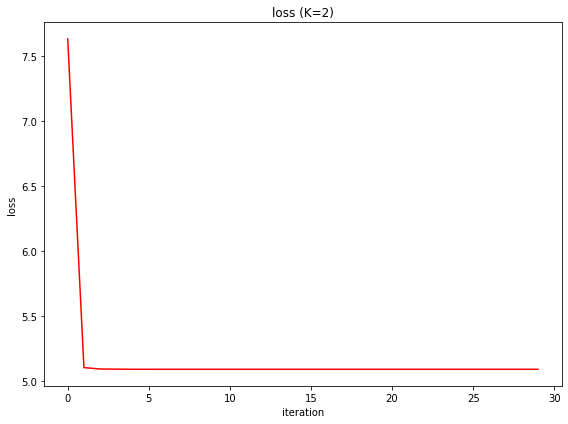

**************************************************
## [RESULT 06]
**************************************************


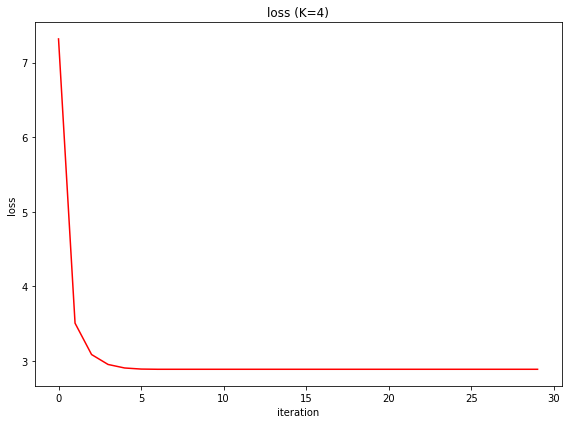

**************************************************
## [RESULT 07]
**************************************************


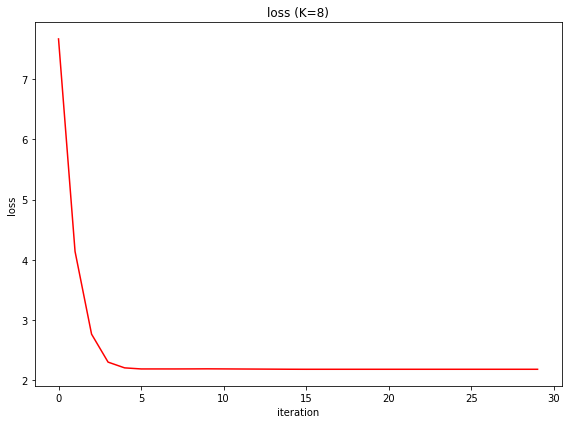

**************************************************
## [RESULT 08]
**************************************************


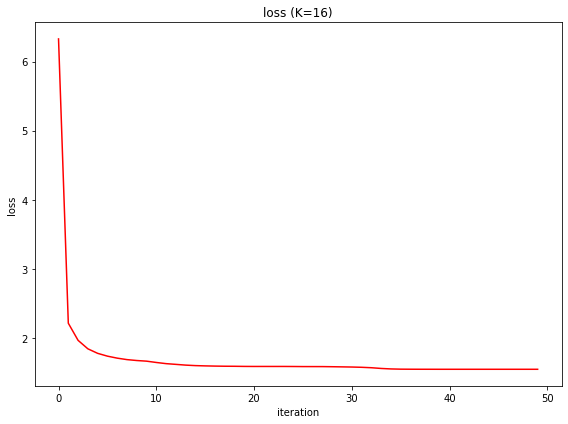

**************************************************
## [RESULT 09]
**************************************************


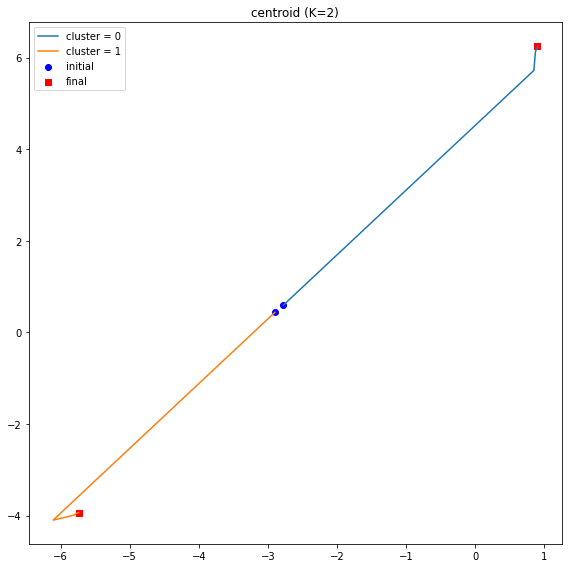

**************************************************
## [RESULT 10]
**************************************************


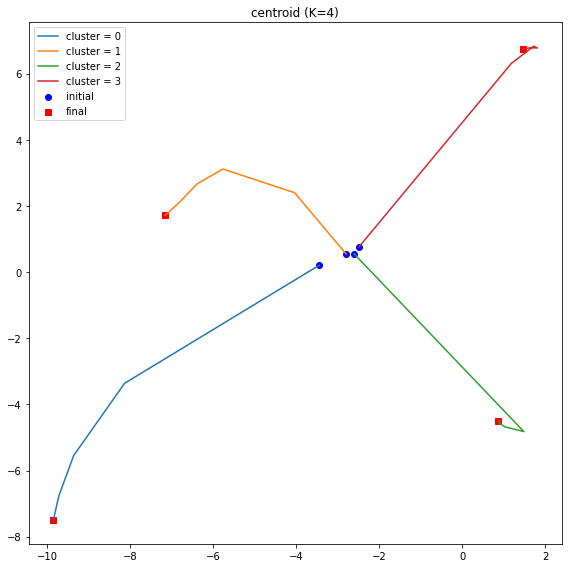

**************************************************
## [RESULT 11]
**************************************************


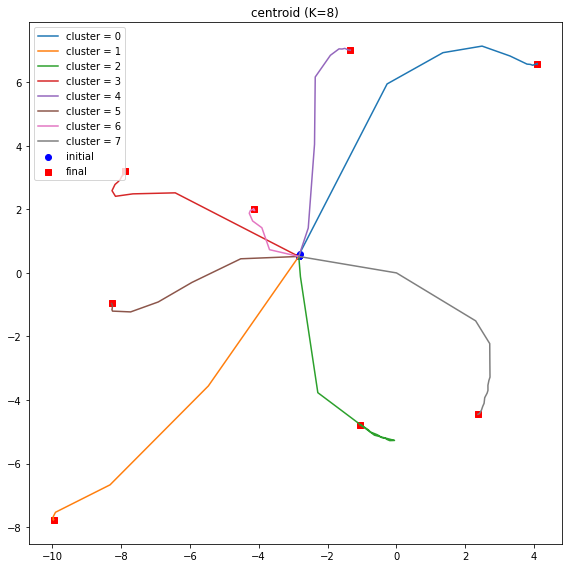

**************************************************
## [RESULT 12]
**************************************************


In [637]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)